Cumulative wealth distribution
=========================

How many of the richest have the same wealth as the bottom x?

In [64]:
import pandas as pd
import numpy as np
import microdf as mdf
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mdf.set_plot_style()

### DATA ###

COLS = ['networth', 'income', 'wgt', 'famstruct', 'kids']
scf_raw = mdf.read_stata_zip(
    'https://www.federalreserve.gov/econres/files/scfp2016s.zip',
    columns=COLS)

In [65]:
scf = scf_raw.copy(deep=True)

In [66]:
scf.sort_values('networth', inplace=True)

In [67]:
mdf.add_weighted_metrics(scf, 'networth', 'wgt')

In [68]:
scf['cum_nw_m'] = scf.networth_m.cumsum()
scf['cum_hhs_m'] = scf.wgt.cumsum() / 1e6
scf['cum_hhs_share'] = scf.cum_hhs_m / scf.cum_hhs_m.max()

In [69]:
scf[scf.cum_nw_m > 0]

,networth,income,wgt,famstruct,kids,wgt_m,networth_m,cum_nw_m,cum_hhs_m,cum_hhs_share
28566,4.103000e+04,9.822573e+04,5451.335235,4,3,0.005451,223.668285,1.515528e+02,47.730440,0.378868
28567,4.103000e+04,9.721310e+04,5376.533380,4,3,0.005377,220.599165,3.721519e+02,47.735817,0.378911
24639,4.103000e+04,1.012636e+04,3754.836868,5,0,0.003755,154.060957,5.262129e+02,47.739572,0.378941
29068,4.104000e+04,4.354337e+04,4713.032755,4,1,0.004713,193.422864,7.196357e+02,47.744285,0.378978
8777,4.104100e+04,3.746755e+04,3758.643452,5,0,0.003759,154.258486,8.738942e+02,47.748043,0.379008
...,...,...,...,...,...,...,...,...,...,...
3387,1.527540e+09,3.546253e+07,2.639253,5,0,0.000003,4031.565248,8.684867e+07,125.981690,1.000000
3386,1.553530e+09,4.190289e+07,2.601305,5,0,0.000003,4041.204815,8.685271e+07,125.981693,1.000000
3388,1.562180e+09,3.501697e+07,2.620355,5,0,0.000003,4093.465553,8.685680e+07,125.981695,1.000000
3389,1.589510e+09,3.910802e+07,2.656258,5,0,0.000003,4222.148158,8.686103e+07,125.981698,1.000000


In [26]:
2e6

2000000.0

In [25]:
scf

,networth,wgt,famstruct,kids,wgt_m,networth_m,cum_nw_m,cum_hhs_m,cum_hhs_share
28406,-2.089970e+06,641.375960,3,0,0.000641,-1340.456514,-1.340457e+03,0.000641,0.000005
28405,-2.042900e+06,698.491275,3,0,0.000698,-1426.947825,-2.767404e+03,0.001340,0.000011
28409,-2.042000e+06,650.791750,3,0,0.000651,-1328.916753,-4.096321e+03,0.001991,0.000016
28408,-2.036700e+06,679.838731,3,0,0.000680,-1384.627543,-5.480949e+03,0.002670,0.000021
28407,-2.034130e+06,684.344668,3,0,0.000684,-1392.046019,-6.872995e+03,0.003355,0.000027
...,...,...,...,...,...,...,...,...,...
3387,1.527540e+09,2.639253,5,0,0.000003,4031.565248,8.684867e+07,125.981690,1.000000
3386,1.553530e+09,2.601305,5,0,0.000003,4041.204815,8.685271e+07,125.981693,1.000000
3388,1.562180e+09,2.620355,5,0,0.000003,4093.465553,8.685680e+07,125.981695,1.000000
3389,1.589510e+09,2.656258,5,0,0.000003,4222.148158,8.686103e+07,125.981698,1.000000


In [37]:
scf['cum_nw'] = scf.cum_nw_m * 1e6

Share with negative net worth.

Income vs. net worth scatter.

https://seaborn.pydata.org/generated/seaborn.regplot.html

https://stackoverflow.com/a/29887532/1840471

In [72]:

scf

,networth,income,wgt,famstruct,kids,wgt_m,networth_m,cum_nw_m,cum_hhs_m,cum_hhs_share
28406,-2.089970e+06,1.032889e+05,641.375960,3,0,0.000641,-1340.456514,-1.340457e+03,0.000641,0.000005
28405,-2.042900e+06,1.043016e+05,698.491275,3,0,0.000698,-1426.947825,-2.767404e+03,0.001340,0.000011
28409,-2.042000e+06,1.053142e+05,650.791750,3,0,0.000651,-1328.916753,-4.096321e+03,0.001991,0.000016
28408,-2.036700e+06,1.022763e+05,679.838731,3,0,0.000680,-1384.627543,-5.480949e+03,0.002670,0.000021
28407,-2.034130e+06,1.083521e+05,684.344668,3,0,0.000684,-1392.046019,-6.872995e+03,0.003355,0.000027
...,...,...,...,...,...,...,...,...,...,...
3387,1.527540e+09,3.546253e+07,2.639253,5,0,0.000003,4031.565248,8.684867e+07,125.981690,1.000000
3386,1.553530e+09,4.190289e+07,2.601305,5,0,0.000003,4041.204815,8.685271e+07,125.981693,1.000000
3388,1.562180e+09,3.501697e+07,2.620355,5,0,0.000003,4093.465553,8.685680e+07,125.981695,1.000000
3389,1.589510e+09,3.910802e+07,2.656258,5,0,0.000003,4222.148158,8.686103e+07,125.981698,1.000000


Cumulative chart

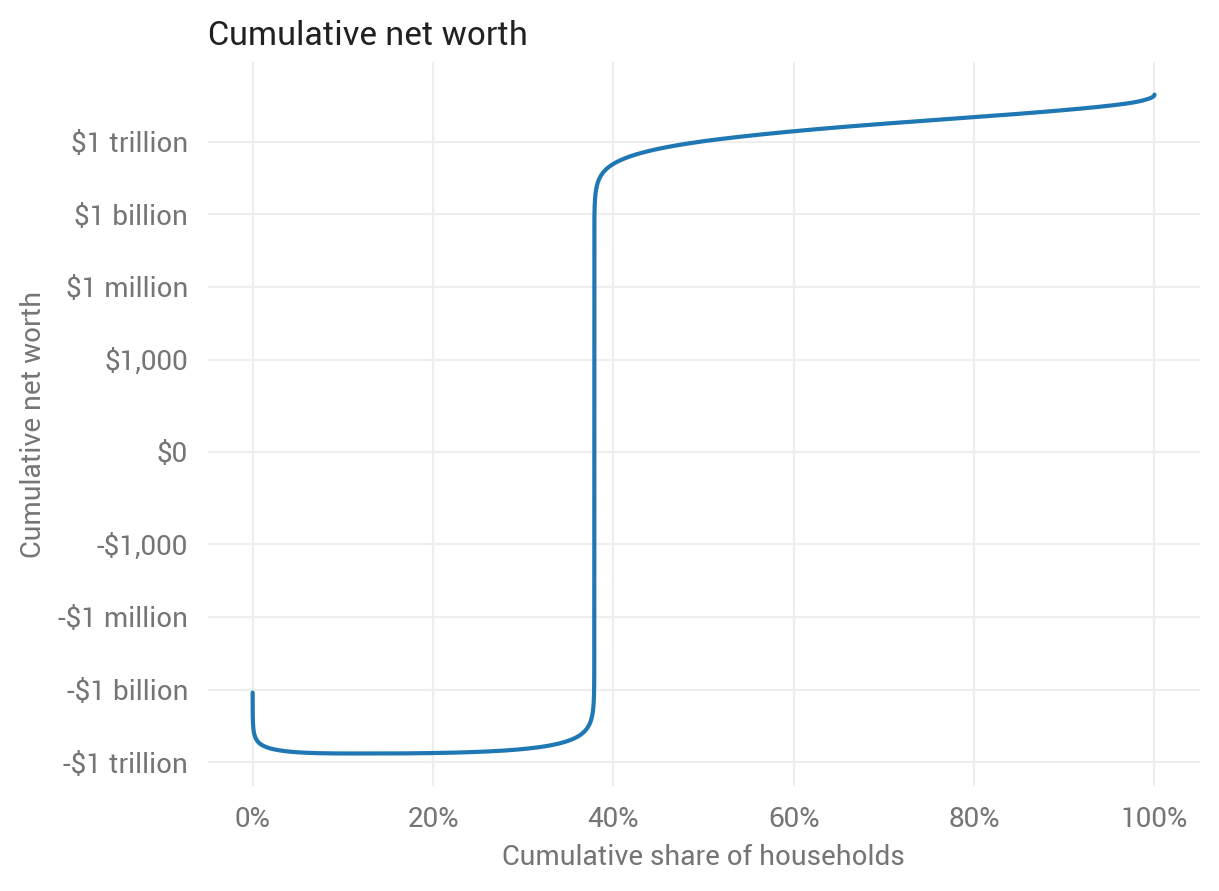

In [43]:
ax = scf.plot('cum_hhs_share', 'cum_nw')
plt.xlabel('Cumulative share of households')
plt.yscale('symlog')
plt.ylabel('Cumulative net worth')
ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax.get_legend().remove()
plt.yticks([-1e12, -1e9, -1e6, -1e3, 0, 1e3, 1e6, 1e9, 1e12],
           ['-$1 trillion', '-$1 billion', '-$1 million', '-$1,000',
            '$0', '$1,000', '$1 million', '$1 billion', '$1 trillion'])
plt.title('Cumulative net worth', loc='left')
plt.show()

Focus on \\$0 to \\$200 billion.

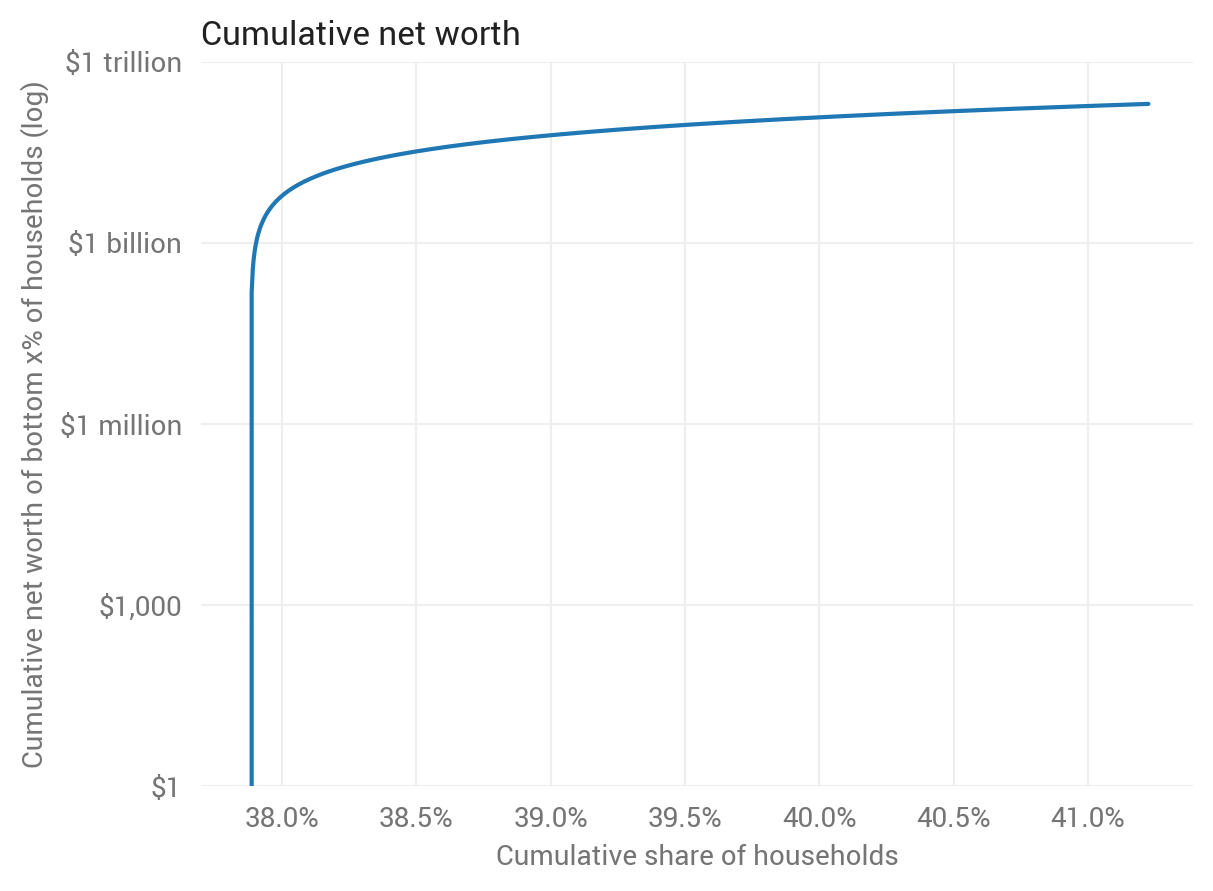

In [55]:
ax = scf[scf.cum_nw.between(-1e9, 200e9)].plot('cum_hhs_share', 'cum_nw')
plt.xlabel('Cumulative share of households')
plt.yscale('log')
plt.ylabel('Cumulative net worth of bottom x% of households (log)')
ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=1))
ax.get_legend().remove()
plt.yticks([1, 1e3, 1e6, 1e9, 1e12],
           ['$1', '$1,000', '$1 million', '$1 billion', '$1 trillion'])
plt.title('Cumulative net worth', loc='left')
plt.show()

In [ ]:
ax = scf[scf.cum_nw.between(-1e9, 200e9)].plot('cum_hhs_share', 'cum_nw')
plt.xlabel('Cumulative share of households')
plt.yscale('log')
plt.ylabel('Cumulative net worth of bottom x% of households (log)')
ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=1))
ax.get_legend().remove()
plt.yticks([1, 1e3, 1e6, 1e9, 1e12],
           ['$1', '$1,000', '$1 million', '$1 billion', '$1 trillion'])
plt.title('Cumulative net worth', loc='left')
plt.show()

In [57]:
def lookup_share(net_worth):
    """ Find share of households with cumulative net worth below a value.
    
    Args:
        net_worth: Value.
        
    Returns:
        Cumulative share of households with aggregate net worth below
        net_worth.
    """
    return scf[scf.cum_nw < net_worth].cum_hhs_share.max()

In [60]:
scf[scf.cum_nw < 2e6]

,networth,wgt,famstruct,kids,wgt_m,networth_m,cum_nw_m,cum_hhs_m,cum_hhs_share,cum_nw
28406,-2089970.0,641.375960,3,0,0.000641,-1340.456514,-1340.456514,0.000641,0.000005,-1.340457e+09
28405,-2042900.0,698.491275,3,0,0.000698,-1426.947825,-2767.404339,0.001340,0.000011,-2.767404e+09
28409,-2042000.0,650.791750,3,0,0.000651,-1328.916753,-4096.321092,0.001991,0.000016,-4.096321e+09
28408,-2036700.0,679.838731,3,0,0.000680,-1384.627543,-5480.948635,0.002670,0.000021,-5.480949e+09
28407,-2034130.0,684.344668,3,0,0.000684,-1392.046019,-6872.994654,0.003355,0.000027,-6.872995e+09
...,...,...,...,...,...,...,...,...,...,...
9497,41000.0,5110.574970,5,0,0.005111,209.533574,-826.225919,47.706604,0.378679,-8.262259e+08
19631,41000.0,4232.777520,5,0,0.004233,173.543878,-652.682040,47.710837,0.378712,-6.526820e+08
29066,41020.0,4708.319272,4,1,0.004708,193.135257,-459.546784,47.715545,0.378750,-4.595468e+08
4557,41020.0,4030.171450,4,2,0.004030,165.317633,-294.229151,47.719576,0.378782,-2.942292e+08


In [63]:
SANDERS_NW = 2e6
BEZOS_NW = 189.2e9
GATES_NW = 110.7e9

key_vals = pd.DataFrame({'net_worth':
                         [0, 2e6, GATES_NW, BEZOS_NW, GATES_NW + BEZOS_NW]})
key_vals['cum_hh_share'] = key_vals.net_worth.apply(lookup_share)
key_vals

,net_worth,cum_hh_share
0,0.000000e+00,0.378825
1,2.000000e+06,0.378825
2,1.107000e+11,0.398522
3,1.892000e+11,0.410672
4,2.999000e+11,0.425932


Refs:

IPS study: https://inequality.org/wp-content/uploads/2017/11/BILLIONAIRE-BONANZA-2017-Embargoed.pdf

Wolff study: https://www.nber.org/papers/w20733.pdf

NIPA defining consumer durables as expenditure rather than investment: https://www.bea.gov/sites/default/files/methodologies/nipa-handbook-all-chapters.pdf

Dan Price tweet: https://twitter.com/DanPriceSeattle/status/1274545094721441792


0.3788247716546822